In [1]:
import torch as th
import torch.nn.functional as F
import numpy as np
import math
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D


def generate_points():
    #points = np.random.random((4, 3))
    points = np.random.uniform(-2, 2, size=(4, 3))
    return th.tensor(points, dtype=th.float)

def plot_planes_and_dihedral(points, dihedral):
    fig = plt.figure()
    ax = fig.add_subplot(111, projection='3d')
    
    # Plot points
    ax.scatter(points[:, 0], points[:, 1], points[:, 2], c='r', marker='o')
    
    # Plot lines connecting points
    for i in range(3):
        ax.plot(points[i:i+2, 0], points[i:i+2, 1], points[i:i+2, 2], c='b')
    
    # Compute and plot planes
    u0 = points[1] - points[0]
    u1 = points[2] - points[1]
    u2 = points[3] - points[2]
    
    # normal vectors
    n1 = th.cross(u0, u1)
    n2 = th.cross(u1, u2)
    
    p1 = points[1].numpy()
    p2 = points[2].numpy()
    
    # equation of plane : ax + by + cz + d = 0
    # where a, b, and c are the components of the normal vector
    d1 = -np.dot(n1, p1)
    d2 = -np.dot(n2, p2)
    
    xx, yy = np.meshgrid(np.linspace(-1, 2, 10), np.linspace(-1, 2, 10))
    
    # Calculates the z-coordinates for each combination of x and y coordinates 
    # in the meshgrid arrays (xx, yy)
    zz1 = (-n1[0] * xx - n1[1] * yy - d1) * 1.0 / n1[2]
    zz2 = (-n2[0] * xx - n2[1] * yy - d2) * 1.0 / n2[2]
    
    '''
    why not "zz1 = (-n1[0] * p1[0] - n1[1] * p1[1] - d1) * 1.0 / n1[2]" instead ?

    if we were to use this suggested expression, we would only get the z-coordinate 
    for the specific point p on the plane, rather than generating a grid of 
    z-coordinates that represent the entire surface of the plane. 

    By using the meshgrid arrays xx and yy, we can calculate the z-coordinates 
    for each combination of x and y coordinates, effectively defining the surfaces 
    of the two planes, which is the main purpose of computing zz1 and zz2 in this code.
    '''

    ax.plot_surface(xx, yy, zz1, alpha=0.5, color='g')
    ax.plot_surface(xx, yy, zz2, alpha=0.5, color='y')
    
    # Display dihedral angle
    plt.title(f'Dihedral angle: {math.degrees(dihedral):.2f} degrees')
    #plt.title(f'Dihedral angle: {dihedral:.2f} radians')
    plt.show()

points = generate_points()
print("points = ", points)

points =  tensor([[ 1.6356,  0.8110,  0.3370],
        [-1.2684, -1.2420, -0.5470],
        [-1.8262, -0.6004,  1.6904],
        [-1.6308,  1.1208,  1.5739]])


dihedral =  tensor(0.9078)


/usr/local/lib/python3.10/dist-packages/mpl_toolkits/mplot3d/proj3d.py:210: FutureWarning: The input object of type 'Tensor' is an array-like implementing one of the corresponding protocols (`__array__`, `__array_interface__` or `__array_struct__`); but not a sequence (or 0-D). In the future, this object will be coerced as if it was first converted using `np.array(obj)`. To retain the old behaviour, you have to either modify the type 'Tensor', or assign to an empty array created with `np.empty(correct_shape, dtype=object)`.
  return np.array([xs, ys, zs, np.ones_like(xs)])
/usr/local/lib/python3.10/dist-packages/mpl_toolkits/mplot3d/proj3d.py:210: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  return np.array([xs, ys, zs, np.ones_like(xs)])


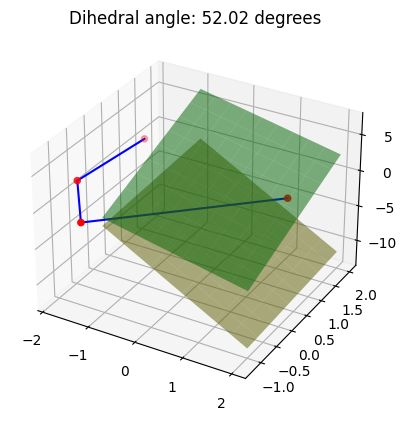

In [2]:
# https://github.com/A4Bio/PiFold/blob/f111d66ed4c184b9614ed670da26469dcc35e588/utils/simdesign_utils.py#L36
# https://en.wikipedia.org/wiki/Dihedral_angle#In_polymer_physics

def _dihedrals(points):

    u_1 = points[1] - points[0]
    u_2 = points[2] - points[1]
    u_3 = points[3] - points[2]

    u1u2_cross = th.cross(u_1, u_2)
    u2u3_cross = th.cross(u_2, u_3)

    return th.atan2(
        (u_2 * th.cross(u1u2_cross, u2u3_cross)).sum(-1),
        (th.norm(u_2, dim=-1, keepdim=True) * u1u2_cross * u2u3_cross).sum(-1)
    )

dihedral = _dihedrals(points)

print("dihedral = ", dihedral)

plot_planes_and_dihedral(points, dihedral)

dihedral =  0.90783554


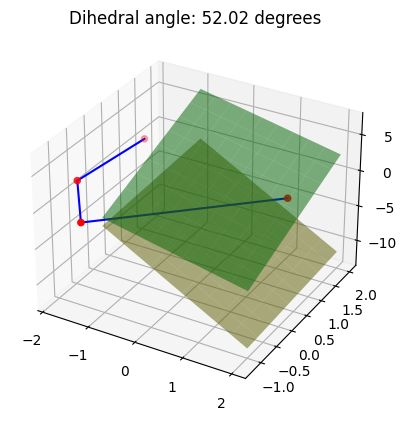

In [3]:
# https://github.com/microsoft/protein-sequence-models/blob/0eecb6e22dd20229e5fe718878c9aab379fbb795/sequence_models/pdb_utils.py#L9

def get_dihedrals(points):
    a, b, c, d = points[:4]
    b0 = -1.0 * (b - a)
    b1 = c - b
    b2 = d - c
    b1 /= np.linalg.norm(b1)
    v = b0 - np.sum(b0 * b1) * b1
    w = b2 - np.sum(b2 * b1) * b1
    x = np.sum(v * w)
    y = np.sum(np.cross(b1, v) * w)
    return np.arctan2(y, x)

points = np.array(points)

dihedral = get_dihedrals(points)

print("dihedral = ", dihedral)

points = th.tensor(points, dtype=th.float)
plot_planes_and_dihedral(points, dihedral)